# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
print("Beginning data retrieval..." + "\n" + "-----")
cit_num = 1
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
wind = []
weathercheck = [clouds, country, date, humidity, lat, lng, maxtemp, wind]
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
    weather = requests.get(query_url).json()
    try:
        #weather = requests.get(query_url).json()
        print(f"Retrieving city #{cit_num}: {city}")
        clouds.append(weather['clouds']['all'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        humidity.append(weather['main']['humidity'])
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
        maxtemp.append(weather['main']['temp_max'])
        wind.append(weather['wind']['speed'])     
               
    except KeyError:
        country.append(np.nan)
        date.append(np.nan)
        humidity.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        maxtemp.append(np.nan)
        wind.append(np.nan)
        clouds.append(0)

    cit_num = cit_num + 1   
print("-----" + "\n" + "Data retrieval complete.")

Beginning data retrieval...
-----
Retrieving city #1: castro
Retrieving city #2: saint-philippe
Retrieving city #3: tsihombe
Retrieving city #4: rikitea
Retrieving city #5: hilo
Retrieving city #6: hermanus
Retrieving city #7: nikolskoye
Retrieving city #8: cape town
Retrieving city #9: malakal
Retrieving city #10: tuktoyaktuk
Retrieving city #11: hofn
Retrieving city #12: buariki
Retrieving city #13: cidreira
Retrieving city #14: longyearbyen
Retrieving city #15: bengkulu
Retrieving city #16: amderma
Retrieving city #17: atuona
Retrieving city #18: seymchan
Retrieving city #19: punta alta
Retrieving city #20: atar
Retrieving city #21: buchanan
Retrieving city #22: port blair
Retrieving city #23: palabuhanratu
Retrieving city #24: groningen
Retrieving city #25: puerto ayora
Retrieving city #26: leh
Retrieving city #27: norman wells
Retrieving city #28: popondetta
Retrieving city #29: jamestown
Retrieving city #30: sakakah
Retrieving city #31: saint george
Retrieving city #32: hasaki
Re

Retrieving city #266: villa carlos paz
Retrieving city #267: grand gaube
Retrieving city #268: marsa matruh
Retrieving city #269: chandbali
Retrieving city #270: marcona
Retrieving city #271: sagua de tanamo
Retrieving city #272: kutum
Retrieving city #273: west wendover
Retrieving city #274: hobyo
Retrieving city #275: conceicao do araguaia
Retrieving city #276: macon
Retrieving city #277: dunedin
Retrieving city #278: ambon
Retrieving city #279: santa fe
Retrieving city #280: schattdorf
Retrieving city #281: chicama
Retrieving city #282: kahului
Retrieving city #283: toliary
Retrieving city #284: sistranda
Retrieving city #285: cervo
Retrieving city #286: trelew
Retrieving city #287: kaitong
Retrieving city #288: tasiilaq
Retrieving city #289: gambela
Retrieving city #290: lavrentiya
Retrieving city #291: port antonio
Retrieving city #292: saint-denis
Retrieving city #293: kati
Retrieving city #294: vila do maio
Retrieving city #295: mao
Retrieving city #296: acapulco
Retrieving city

Retrieving city #531: the valley
Retrieving city #532: kamen-rybolov
Retrieving city #533: palembang
Retrieving city #534: tezu
Retrieving city #535: rajec
Retrieving city #536: techirghiol
Retrieving city #537: laguna
Retrieving city #538: andevoranto
Retrieving city #539: kampot
Retrieving city #540: taft
Retrieving city #541: abeche
Retrieving city #542: zhezkazgan
Retrieving city #543: coquimbo
Retrieving city #544: lorengau
Retrieving city #545: champerico
Retrieving city #546: half moon bay
Retrieving city #547: asau
Retrieving city #548: laukaa
Retrieving city #549: beipiao
Retrieving city #550: nhulunbuy
Retrieving city #551: barawe
Retrieving city #552: whitianga
Retrieving city #553: huarmey
Retrieving city #554: san luis
Retrieving city #555: ornes
Retrieving city #556: jardim
Retrieving city #557: paradwip
Retrieving city #558: vestmannaeyjar
Retrieving city #559: la ronge
Retrieving city #560: sangar
Retrieving city #561: acari
Retrieving city #562: tautira
Retrieving city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:
weather_dict = {
    "city": cities,
    "clouds": clouds,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lat": lat,
    "lng": lng,
    "max temp": maxtemp,
    "windspeed": wind
}

weather_df = pd.DataFrame(weather_dict)
weather_df = weather_df.dropna(how='any')
final_citnum = weather_df['city'].count()
weather_df.to_csv("weatherdata.csv", index=False, header=True) 
print(f"There are {final_citnum} observations.")
weather_df

 

There are 539 observations.


,city,clouds,country,date,humidity,lat,lng,max temp,windspeed
0,castro,0,CL,1.574440e+09,55.0,-42.48,-73.76,60.80,6.93
1,saint-philippe,90,CA,1.574440e+09,80.0,45.36,-73.48,43.00,20.80
3,rikitea,90,PF,1.574440e+09,85.0,-23.12,-134.97,73.06,14.92
4,hilo,90,US,1.574440e+09,83.0,19.71,-155.08,71.60,6.93
5,hermanus,5,ZA,1.574440e+09,75.0,-34.42,19.24,68.00,3.00
...,...,...,...,...,...,...,...,...,...
594,vila velha,20,BR,1.574440e+09,55.0,-3.71,-38.60,87.80,14.99
595,biloela,0,AU,1.574440e+09,86.0,-24.40,150.51,61.07,2.98
596,mana,100,NG,1.574440e+09,18.0,13.03,5.27,83.62,1.90
597,aasiaat,100,GL,1.574440e+09,71.0,68.71,-52.87,9.84,6.85


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

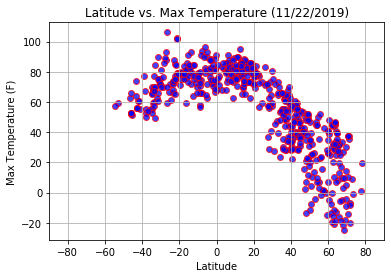

In [74]:
plt.title("Latitude vs. Max Temperature (11/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.grid()
plt.scatter(weather_df['lat'], weather_df['max temp'], marker="o", facecolors="blue", edgecolors="red", alpha=0.75);
plt.savefig("temperature.png")

#### Latitude vs. Humidity Plot

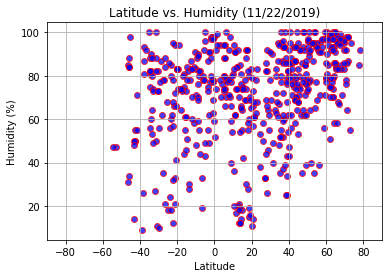

In [75]:
plt.title("Latitude vs. Humidity (11/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.grid()
plt.scatter(weather_df['lat'], weather_df['humidity'], marker="o", facecolors="blue", edgecolors="red", alpha=0.75);
plt.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

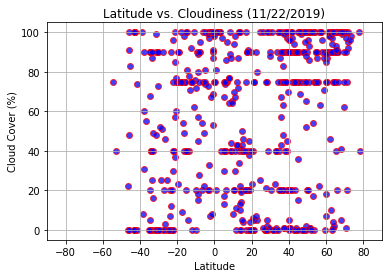

In [76]:
plt.title("Latitude vs. Cloudiness (11/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.xlim(-90, 90)
plt.grid()
plt.scatter(weather_df['lat'], weather_df['clouds'], marker="o", facecolors="blue", edgecolors="red", alpha=0.75);
plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

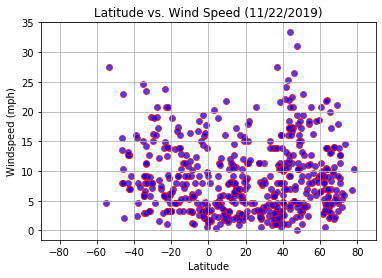

In [77]:
plt.title("Latitude vs. Wind Speed (11/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlim(-90, 90)
plt.grid()
plt.scatter(weather_df['lat'], weather_df['windspeed'], marker="o", facecolors="blue", edgecolors="red", alpha=0.75);
plt.savefig("windspeed.png")